In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
Data = pd.read_csv('C:\\Users\\chril\\Documents\\Python Scripts\\Math180HW1\\Project\\Faellesdata')
Data['IsMigratorBool'] = Data['IsMigrator']
Data['IsMigraterInt'] = Data['IsMigratorBool'].astype(int)
Data.drop('IsMigrator', axis=1, inplace=True)
Data.columns[:-2]

Index(['rsph', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Rcyl', 'phi', 'vRcyl', 'vphi',
       'rsph_form', 'x_form', 'y_form', 'z_form', 'vx_form', 'vy_form',
       'vz_form', 'Rcyl_form', 'phi_form', 'vRcyl_form', 'vphi_form', 'age',
       'mass', 'feh', 'oh', 'ch', 'mgh', 'ofe', 'cfe', 'mgfe'],
      dtype='object')

In [ ]:
print("hi")

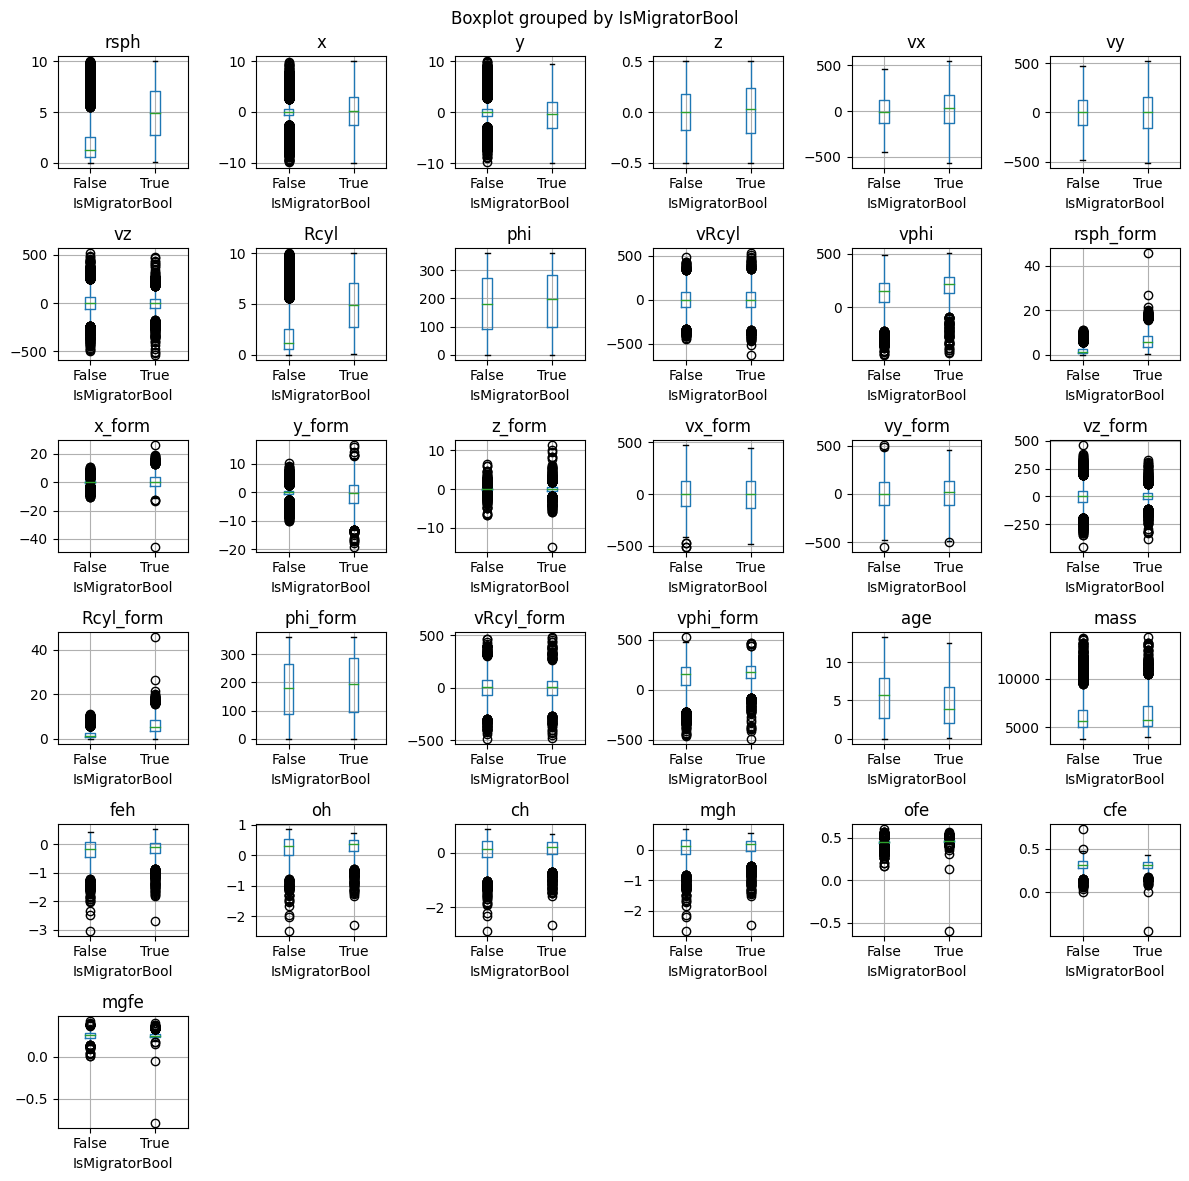

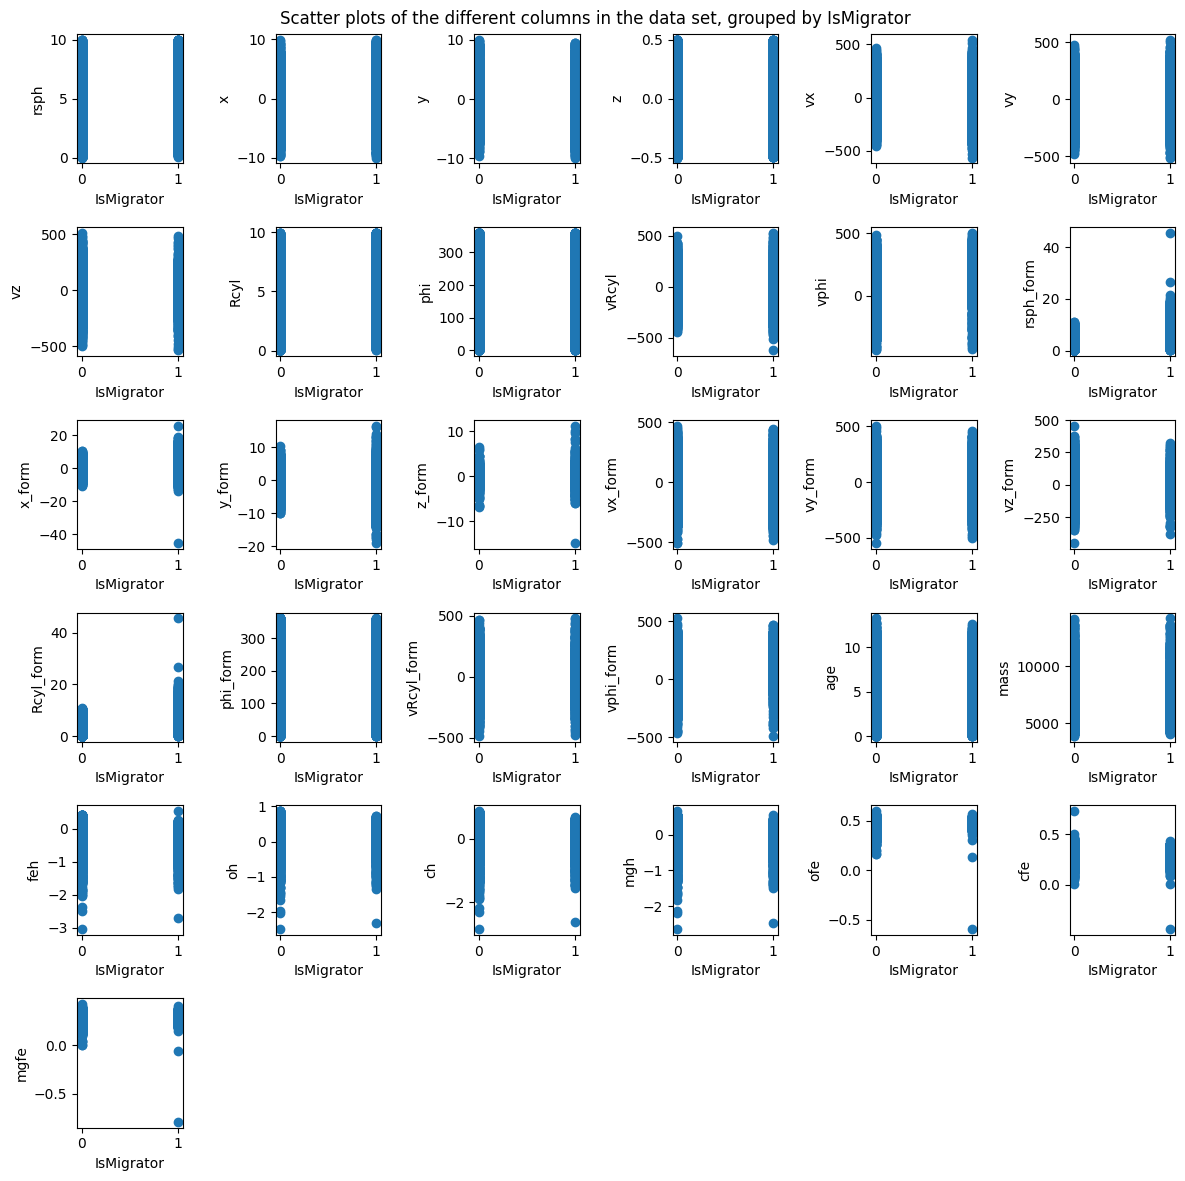

In [66]:
fig, axs = plt.subplots(6, 6, figsize = (12,12)) #Setting up the plot
fig.set_tight_layout(True)
fig.suptitle("Boxplots of the different columns in Auto, grouped by mpg01") #Title

columns = Data.columns[:-2] #All columns except the last two
counter = 0

for i in range(6): #Makes all the boxplots, iterating over the different columns
    for j in range(6):
        Data.boxplot(column = columns[counter], by = 'IsMigratorBool', ax = axs[i,j])
        counter += 1
        if counter == len(columns): break
for i in range(1,6):
    fig.delaxes(axs[5][i]) #Removes empty plots
plt.show() 


fig, axs = plt.subplots(6, 6, figsize = (12,12)) #Setting up the plot
fig.set_tight_layout(True)
fig.suptitle("Scatter plots of the different columns in the data set, grouped by IsMigrator") #Title


counter = 0
for i in range(6): #Makes all the scatter plots, iterating over the different columns
    for j in range(6):
        axs[i][j].scatter(Data["IsMigratorBool"], Data[columns[counter]])
        axs[i][j].set_xlabel("IsMigrator")
        axs[i][j].set_ylabel(columns[counter])
        counter += 1
        if counter == len(columns): break
for i in range(1,6):
    fig.delaxes(axs[5][i]) #Removes empty plots
plt.show() 

### Fitting models

In [67]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [68]:
Data.columns[:-2]

Index(['rsph', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Rcyl', 'phi', 'vRcyl', 'vphi',
       'rsph_form', 'x_form', 'y_form', 'z_form', 'vx_form', 'vy_form',
       'vz_form', 'Rcyl_form', 'phi_form', 'vRcyl_form', 'vphi_form', 'age',
       'mass', 'feh', 'oh', 'ch', 'mgh', 'ofe', 'cfe', 'mgfe'],
      dtype='object')

In [88]:
DataFinal = Data.drop([
        'rsph', 'x', 'y', 'vx', 'vy', 'rsph_form', 'x_form', 
        'y_form', 'z_form', 'vx_form', 'vy_form',
        'vz_form', 'Rcyl_form', 'phi_form', 'vRcyl_form', 'vphi_form'
       ], axis = 1)
DataFinal.columns[:-2]
fitstr = "IsMigratorBool ~ "
for i in range(len(DataFinal.columns[:-2])):
    fitstr += DataFinal.columns[i] + " + "
fitstr = fitstr[:-3]
print(fitstr)

IsMigratorBool ~ z + vz + Rcyl + phi + vRcyl + vphi + age + mass + feh + oh + ch + mgh + ofe + cfe + mgfe


In [89]:
train, test = train_test_split(DataFinal, test_size=0.2)

model = smf.glm(formula = fitstr, data = train, family = sm.families.Binomial())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

                                 Generalized Linear Model Regression Results                                 
Dep. Variable:     ['IsMigratorBool[False]', 'IsMigratorBool[True]']   No. Observations:                 8000
Model:                                                           GLM   Df Residuals:                     7984
Model Family:                                               Binomial   Df Model:                           15
Link Function:                                                 Logit   Scale:                          1.0000
Method:                                                         IRLS   Log-Likelihood:                -2736.6
Date:                                               Mon, 04 Nov 2024   Deviance:                       5473.2
Time:                                                       16:36:23   Pearson chi2:                 7.85e+03
No. Iterations:                                                    6   Pseudo R-squ. (CS):             0.2220
Covariance

In [90]:
train, test = train_test_split(DataFinal, test_size=0.2)

model = smf.glm(formula = "IsMigratorBool ~ age + vphi + Rcyl", data = train, family = sm.families.Binomial())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

                                 Generalized Linear Model Regression Results                                 
Dep. Variable:     ['IsMigratorBool[False]', 'IsMigratorBool[True]']   No. Observations:                 8000
Model:                                                           GLM   Df Residuals:                     7996
Model Family:                                               Binomial   Df Model:                            3
Link Function:                                                 Logit   Scale:                          1.0000
Method:                                                         IRLS   Log-Likelihood:                -2862.8
Date:                                               Mon, 04 Nov 2024   Deviance:                       5725.6
Time:                                                       16:38:17   Pearson chi2:                 7.86e+03
No. Iterations:                                                    6   Pseudo R-squ. (CS):             0.1998
Covariance